In [ ]:
! pip install opendatasets

## Download Kaggle Dataset
import opendatasets as od

od.download("https://www.kaggle.com/datasets/ashutoshiet/sunglasses-image-segmentation")

## bd2c5bd2c00e932fa307ad8a1fbb54c6

Skipping, found downloaded files in "./sunglasses-image-segmentation" (use force=True to force download)


In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tqdm import tqdm
import os
from cv2 import imread, createCLAHE
import cv2
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt

image_path = os.path.join("../content/sunglasses-image-segmentation/data/dataset/train","image")
mask_path = os.path.join("../content/sunglasses-image-segmentation/data/dataset/train","mask")

In [ ]:
image_path

'../content/sunglasses-image-segmentation/data/dataset/train/image'

In [ ]:
print("Number of images: ",len(os.listdir(image_path)))

print("Number of Masks: ",len(os.listdir(mask_path)))

Number of images:  24
Number of Masks:  24


B4121C3_img_05
['B4121C3_img_05.png', 'B4121C3_img_01.png', 'B4120C1_img_05.png', 'B4120C1_img_02.png', 'B4120C2_img_03.png', 'B4120C1_img_04.png']


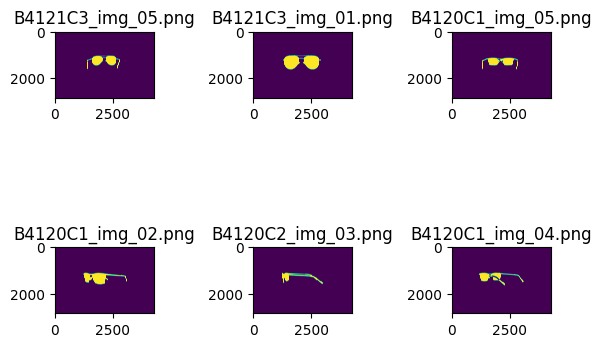

In [ ]:
mask_data = os.listdir(mask_path)
print(mask_data[0].split('.png')[0])

print(mask_data[0:6])

fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=1)
for i in range(1, 7):
    plt.subplot(2, 3, i)
    image = plt.imread(os.path.join(mask_path, mask_data[i-1]))
    plt.imshow(image)
    plt.title(mask_data[i-1])

In [ ]:
mask_data[:6]

['B4121C3_img_05.png',
 'B4121C3_img_01.png',
 'B4120C1_img_05.png',
 'B4120C1_img_02.png',
 'B4120C2_img_03.png',
 'B4120C1_img_04.png']

In [ ]:
test_image_path = os.path.join("../content/sunglasses-image-segmentation/data/dataset/test","image")
test_mask_path = os.path.join("../content/sunglasses-image-segmentation/data/dataset/test","mask")

In [ ]:
testing_files = set(os.listdir(test_image_path)) & set(os.listdir(test_mask_path))
training_files = set(os.listdir(image_path)) & set(os.listdir(mask_path))

print(testing_files)
print(training_files)

print("Number of files used testing: ",len(testing_files))
print("Number of files used training: ",len(training_files))

def getData(X_shape, flag = "test"):
    im_array = []
    mask_array = []

    if flag == "test":
        for i in tqdm(testing_files):
            im = cv2.resize(cv2.imread(os.path.join(test_image_path,i)),(X_shape,X_shape))[:,:,0]
            mask = cv2.resize(cv2.imread(os.path.join(test_mask_path,i)),(X_shape,X_shape))[:,:,0]

            im_array.append(im)
            mask_array.append(mask)

        return im_array,mask_array

    if flag == "train":
        for i in tqdm(training_files):
            im = cv2.resize(cv2.imread(os.path.join(image_path,i)),(X_shape,X_shape))[:,:,0]
            mask = cv2.resize(cv2.imread(os.path.join(mask_path,i)),(X_shape,X_shape))[:,:,0]

            im_array.append(im)
            mask_array.append(mask)

        return im_array,mask_array

{'B4126C2_img_01.png', 'B4126C2_img_04.png', 'B4126C2_img_05.png', 'B4126C2_img_03.png', 'B4126C2_img_07.png', 'B4126C2_img_06.png', 'B4126C2_img_02.png', 'B4126C2_img_08.png'}
{'B4121C3_img_03.png', 'B4121C3_img_08.png', 'B4120C1_img_05.png', 'B4121C3_img_01.png', 'B4121C3_img_07.png', 'B4120C1_img_01.png', 'B4120C1_img_06.png', 'B4121C3_img_02.png', 'B4120C2_img_01.png', 'B4120C1_img_04.png', 'B4121C3_img_06.png', 'B4120C2_img_07.png', 'B4120C1_img_02.png', 'B4121C3_img_04.png', 'B4120C2_img_05.png', 'B4121C3_img_05.png', 'B4120C2_img_03.png', 'B4120C1_img_03.png', 'B4120C1_img_07.png', 'B4120C2_img_04.png', 'B4120C1_img_08.png', 'B4120C2_img_06.png', 'B4120C2_img_08.png', 'B4120C2_img_02.png'}
Number of files used testing:  8
Number of files used training:  24


In [ ]:
#perform sanity check

def plotMask(X,y):
    sample = []

    for i in range(6):
        left = X[i]
        right = y[i]
        combined = np.hstack((left,right))
        sample.append(combined)


    for i in range(0,6,3):

        plt.figure(figsize=(25,10))

        plt.subplot(2,3,1+i)
        plt.imshow(sample[i])

        plt.subplot(2,3,2+i)
        plt.imshow(sample[i+1])


        plt.subplot(2,3,3+i)
        plt.imshow(sample[i+2])

        plt.show()

In [ ]:
# Load training and testing data
dim = 256*2
X_train,y_train = getData(dim,flag="train")
X_test, y_test = getData(dim)

100%|██████████| 8/8 [00:02<00:00,  2.98it/s]


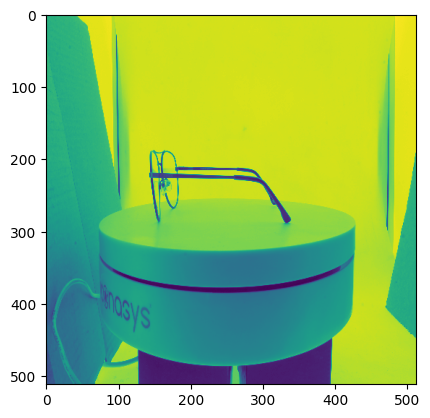

In [ ]:
plt.imshow(X_train[0])

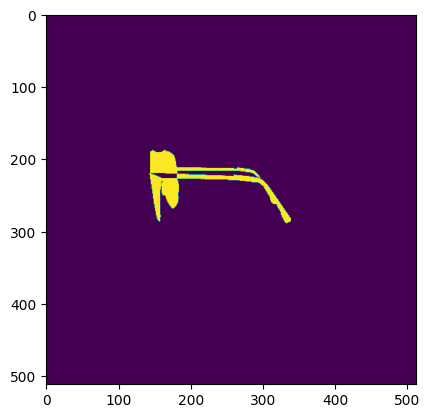

In [ ]:
plt.imshow(y_train[0])

training set


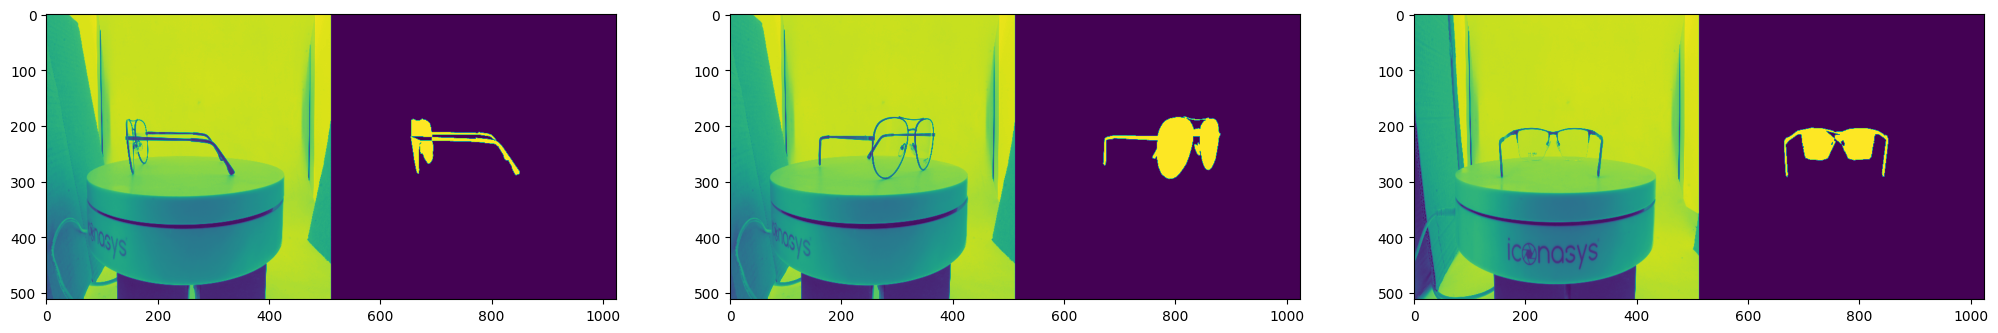

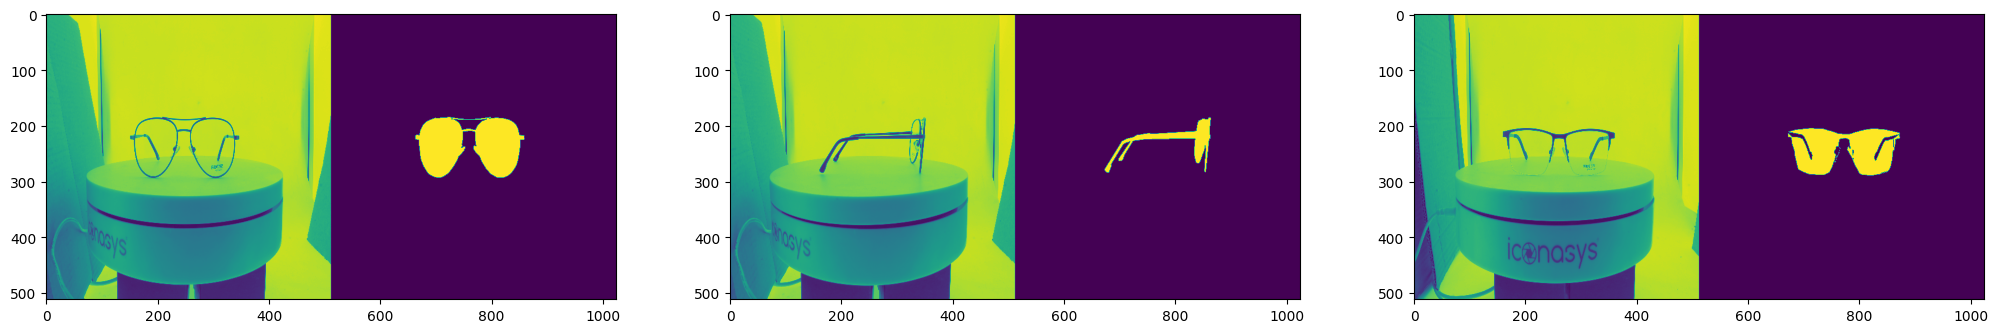

testing set


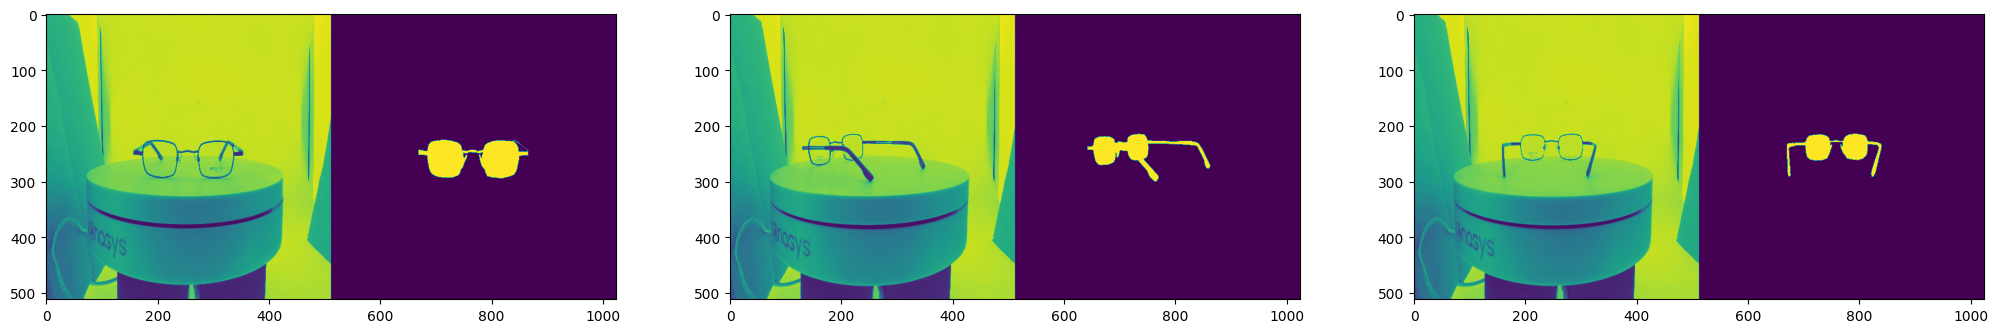

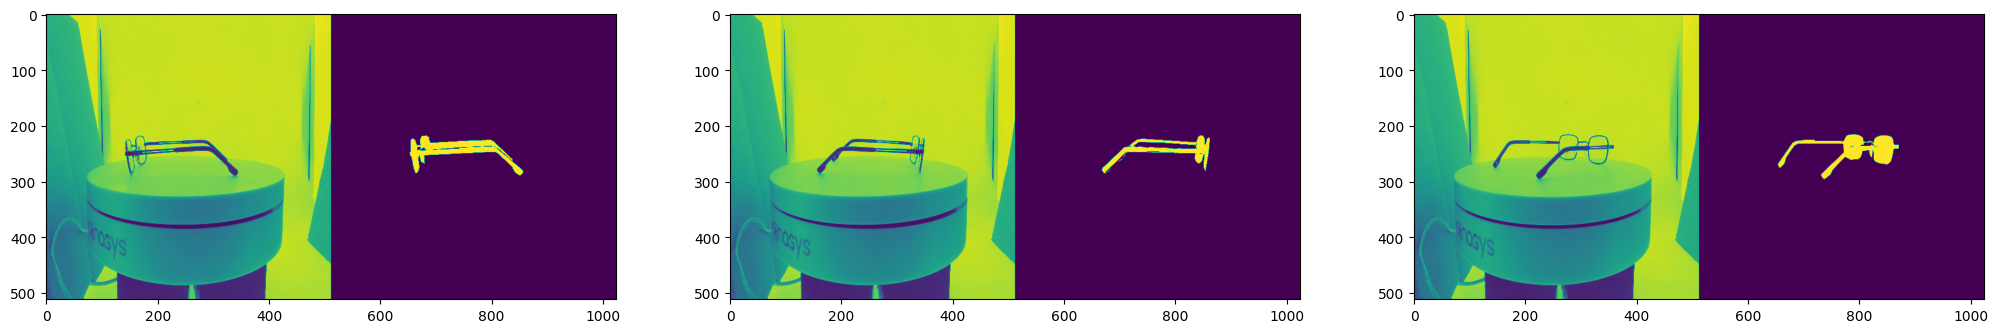

In [ ]:
print("training set")
plotMask(X_train,y_train)
print("testing set")
plotMask(X_test,y_test)

In [ ]:
X_train = np.array(X_train).reshape(len(X_train),dim,dim,1)
y_train = np.array(y_train).reshape(len(y_train),dim,dim,1)
X_test = np.array(X_test).reshape(len(X_test),dim,dim,1)
y_test = np.array(y_test).reshape(len(y_test),dim,dim,1)
assert X_train.shape == y_train.shape
assert X_test.shape == y_test.shape
images = np.concatenate((X_train,X_test),axis=0)
mask  = np.concatenate((y_train,y_test),axis=0)

Define the network and callbacks

In [ ]:
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras import backend as keras
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, LearningRateScheduler

def unet(input_size=(256,256,1)):
    inputs = Input(input_size)

    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2), padding='same')(conv1)

    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2), padding='same')(conv2)

    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2), padding='same')(conv3)

    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2), padding='same')(conv4)

    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)

    up6 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv5), conv4], axis=3)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv6)

    up7 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv6), conv3], axis=3)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv7)

    up8 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv7), conv2], axis=3)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv8)

    up9 = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv8), conv1], axis=3)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv9)

    conv10 = Conv2D(1, (1, 1), activation='sigmoid')(conv9)

    return Model(inputs=[inputs], outputs=[conv10])

In [ ]:
model = unet(input_size=(512,512,1))
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 512, 512, 1)]        0         []                            
                                                                                                  
 conv2d_19 (Conv2D)          (None, 512, 512, 32)         320       ['input_2[0][0]']             
                                                                                                  
 conv2d_20 (Conv2D)          (None, 512, 512, 32)         9248      ['conv2d_19[0][0]']           
                                                                                                  
 max_pooling2d_4 (MaxPoolin  (None, 256, 256, 32)         0         ['conv2d_20[0][0]']           
 g2D)                                                                                       

In [ ]:
!pwd

/content


In [ ]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau

reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                                   patience=3,
                                   verbose=1, mode='min', min_delta=0.0001, cooldown=2, min_lr=1.00)
early = EarlyStopping(monitor="val_loss",
                      mode="min",
                      patience=15) # probably needs to be more patient, but kaggle time is limited
callbacks_list = [early, reduceLROnPlat]

In [ ]:
from IPython.display import clear_output
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

model.compile(optimizer=Adam(learning_rate=0.01), loss=tf.keras.losses.BinaryCrossentropy(),metrics=['binary_accuracy'])

train_vol, validation_vol, train_seg, validation_seg = train_test_split((images-127.0)/127.0,
                                                            (mask>127).astype(np.float32),
                                                            test_size = 0.1,random_state = 2018)

loss_history = model.fit(x = train_vol,
                       y = train_seg,
                         batch_size = 8,
                  epochs = 50,
                  validation_data =(validation_vol,validation_seg) ,
                  callbacks=callbacks_list)

Epoch 1/50
4/4 [==============================] - 9s 625ms/step - loss: 125271.6875 - binary_accuracy: 0.7585 - val_loss: 0.3433 - val_binary_accuracy: 0.9722 - lr: 0.0100
Epoch 2/50
4/4 [==============================] - 2s 469ms/step - loss: 0.5355 - binary_accuracy: 0.9745 - val_loss: 0.3014 - val_binary_accuracy: 0.9722 - lr: 0.0100
Epoch 3/50
4/4 [==============================] - 2s 466ms/step - loss: 0.3925 - binary_accuracy: 0.9411 - val_loss: 0.4071 - val_binary_accuracy: 0.9722 - lr: 0.0100
Epoch 4/50
4/4 [==============================] - 2s 463ms/step - loss: 0.5723 - binary_accuracy: 0.9745 - val_loss: 0.6353 - val_binary_accuracy: 0.9722 - lr: 0.0100
Epoch 5/50
4/4 [==============================] - 2s 462ms/step - loss: 0.6253 - binary_accuracy: 0.9745 - val_loss: 0.5854 - val_binary_accuracy: 0.9722 - lr: 0.0100
Epoch 6/50
4/4 [==============================] - 2s 460ms/step - loss: 0.5079 - binary_accuracy: 0.9745 - val_loss: 0.3577 - val_binary_accuracy: 0.9722 - lr: 

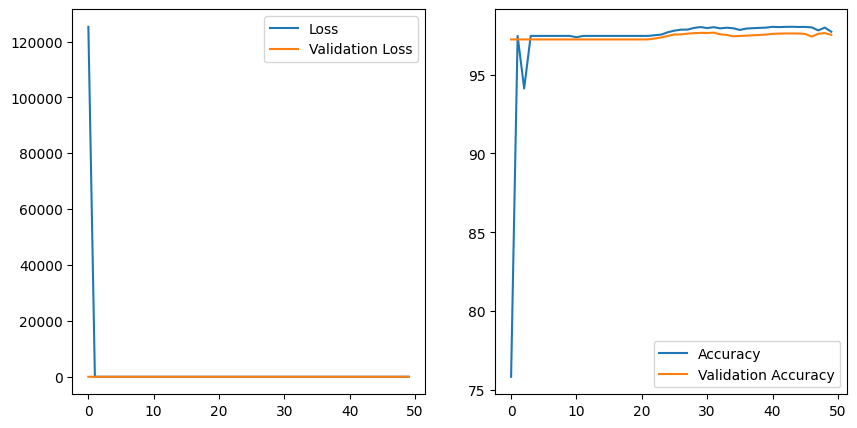

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
ax1.plot(loss_history.history['loss'], '-', label = 'Loss')
ax1.plot(loss_history.history['val_loss'], '-', label = 'Validation Loss')
ax1.legend()

ax2.plot(100*np.array(loss_history.history['binary_accuracy']), '-',
         label = 'Accuracy')
ax2.plot(100*np.array(loss_history.history['val_binary_accuracy']), '-',
         label = 'Validation Accuracy')
ax2.legend()

### **Validation data**

4
(4, 512, 512, 1)
(512, 512, 1)


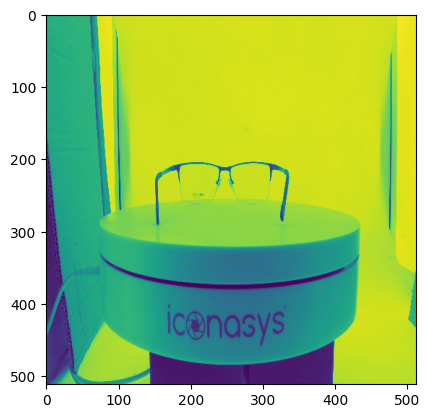

In [ ]:
print(len(validation_vol))
print(validation_vol.shape)
print(validation_vol[0].shape)

plt.imshow(validation_vol[0])

1/1 [==============================] - 0s 252ms/step


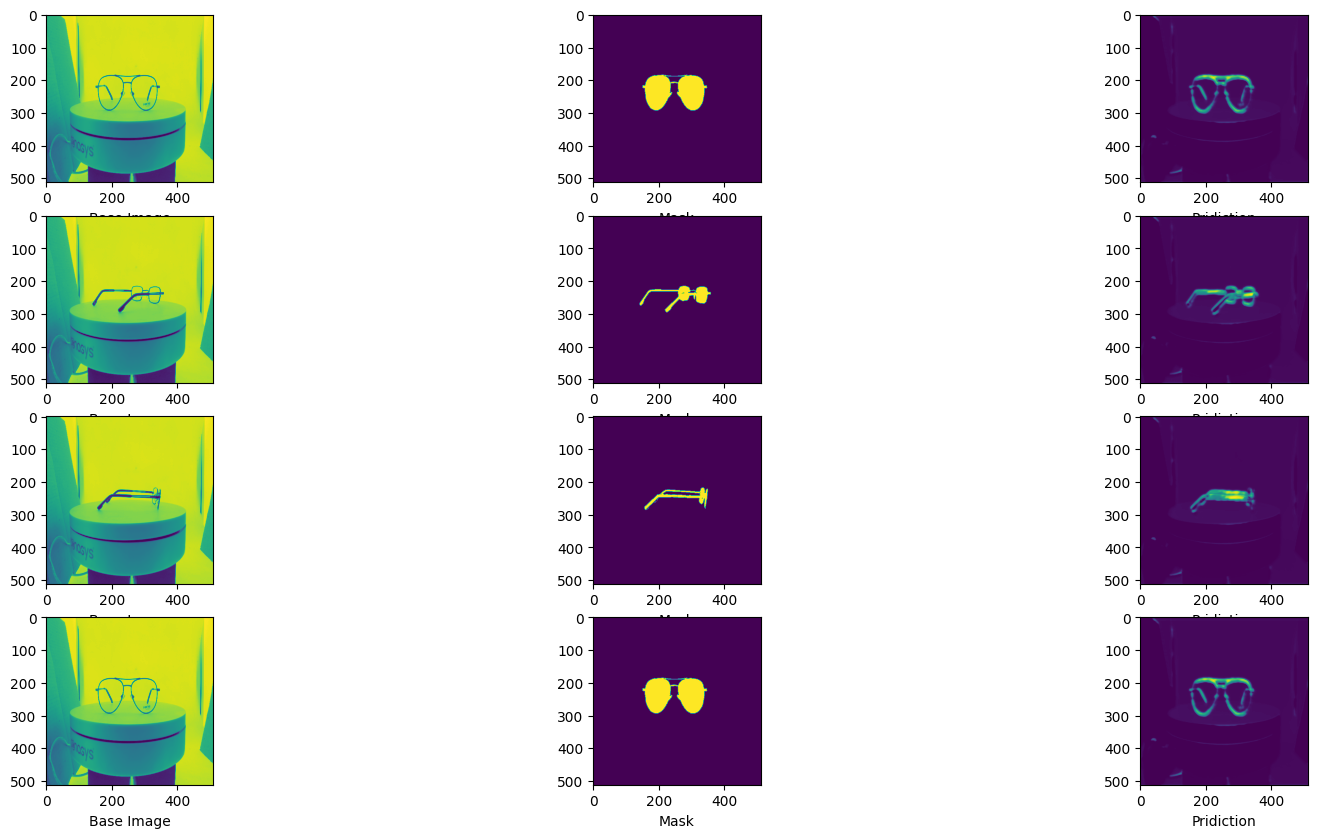

In [ ]:
pred_candidates = np.random.randint(1,validation_vol.shape[0],10)
preds = model.predict(validation_vol)

# print(pred_candidates)
# print(preds)

plt.figure(figsize=(20,10))

for i in range(0,12,3):
    plt.subplot(4,3,i+1)
    plt.imshow(np.squeeze(validation_vol[pred_candidates[i]]))
    plt.xlabel("Base Image")


    plt.subplot(4,3,i+2)
    plt.imshow(np.squeeze(validation_seg[pred_candidates[i]]))
    plt.xlabel("Mask")

    plt.subplot(4,3,i+3)
    plt.imshow(np.squeeze(preds[pred_candidates[i]]))
    plt.xlabel("Pridiction")

### **Testing data**

8
(8, 512, 512, 1)
(512, 512, 1)


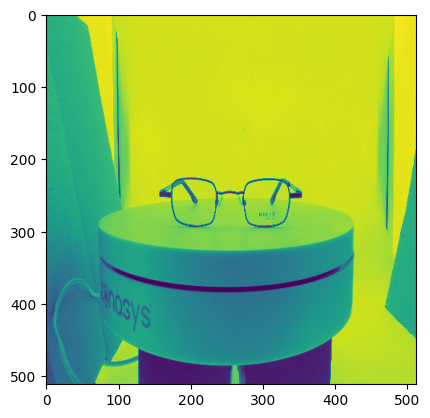

In [ ]:
print(len(X_test))
print(X_test.shape)
print(X_test[0].shape)

plt.imshow(X_test[0])

1/1 [==============================] - 0s 32ms/step


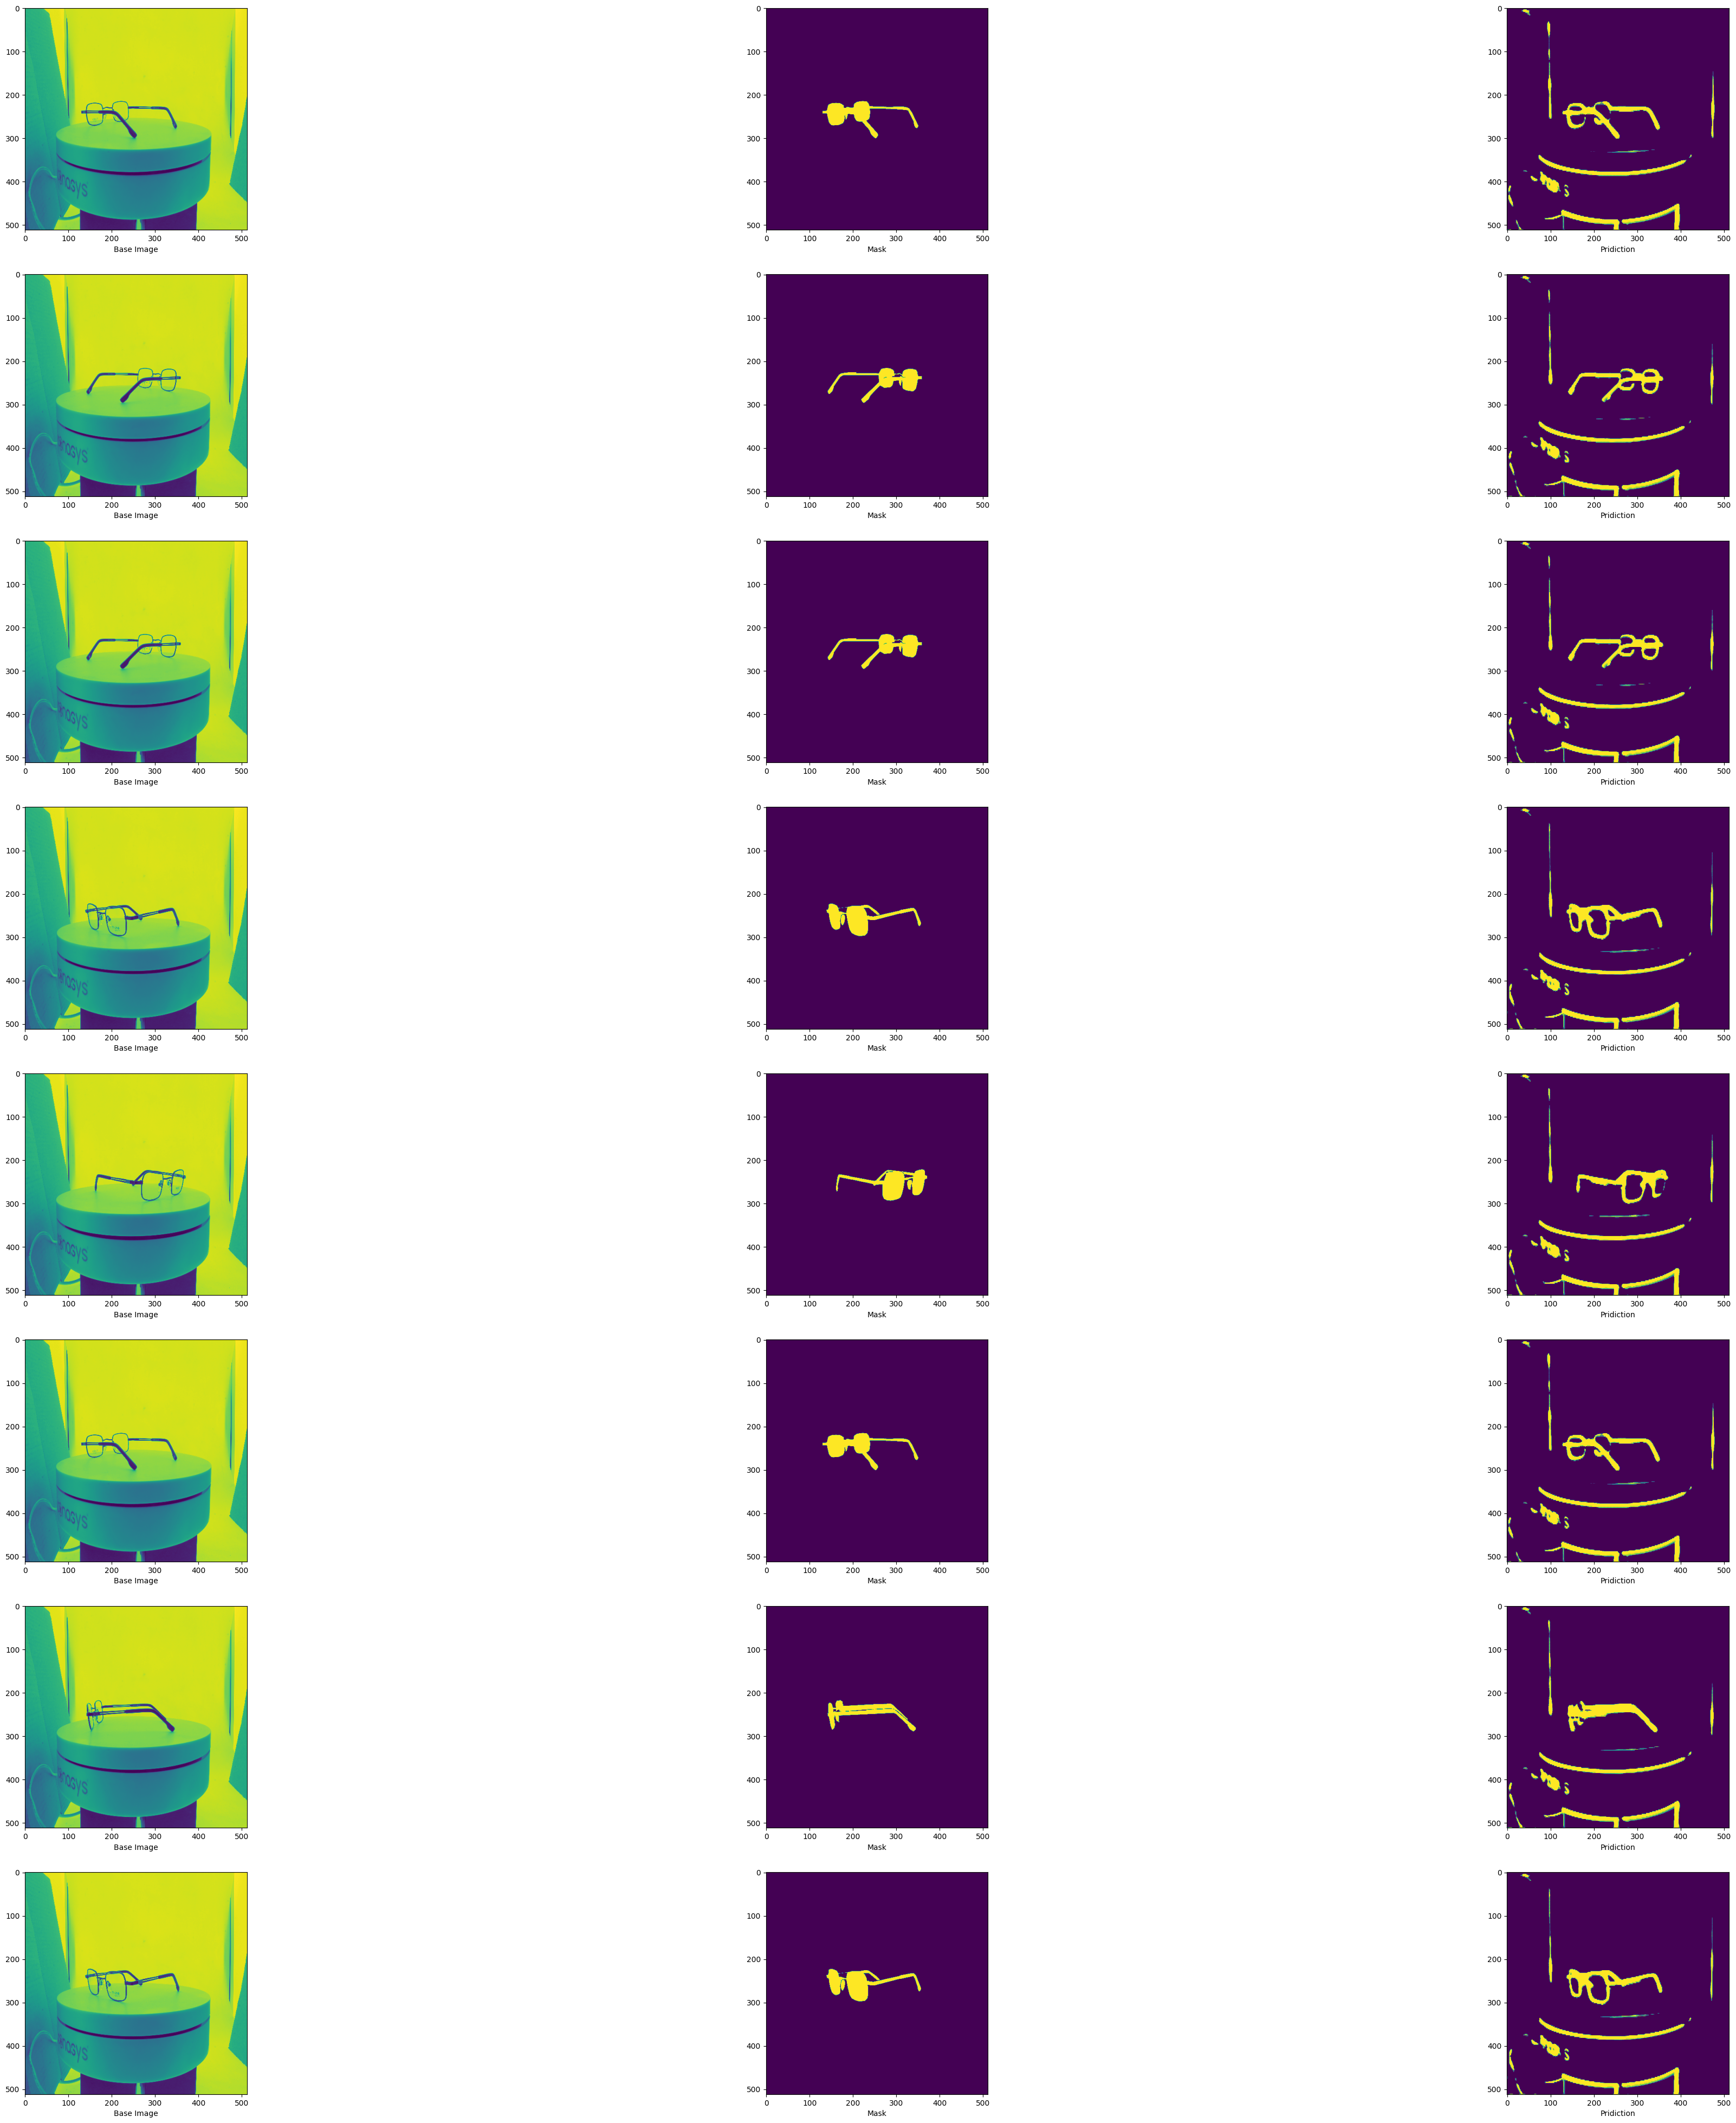

In [ ]:
pred_candidates = np.random.randint(1,X_test.shape[0],50)
preds = model.predict(X_test)

# print(pred_candidates)
# print(preds)

plt.figure(figsize=(50,50))

for i in range(0,24,3):
    plt.subplot(8,3,i+1)
    plt.imshow(np.squeeze(X_test[pred_candidates[i]]))
    plt.xlabel("Base Image")


    plt.subplot(8,3,i+2)
    plt.imshow(np.squeeze(y_test[pred_candidates[i]]))
    plt.xlabel("Mask")

    plt.subplot(8,3,i+3)
    plt.imshow(np.squeeze(preds[pred_candidates[i]]))
    plt.xlabel("Pridiction")